<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Capstone Project: Rossmann Drugstore

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

This machine learning project is taken from Kaggle. The link to the Kaggle competition page is https://www.kaggle.com/c/rossmann-store-sales

In their first Kaggle competition, Rossmann is challenging you to predict **6 weeks of daily sales for 1,115 stores** located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

# Datasets

1. train.csv - The train dataset, containing historical data including sales
2. store.csv - Supplemental information about the stores
3. test.csv - The test dataset, containing historical data excluding sales

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [3]:
# Loading the csv files into dataframes
types = {'StateHoliday': np.dtype(str)}

train = pd.read_csv(".\\train.csv", dtype=types)
store = pd.read_csv(".\\store.csv")
test = pd.read_csv(".\\test.csv")

In [85]:
test.shape

(41088, 8)

In [86]:
test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

# Exploratory Data Analysis

## Train dataframe

Quick summary of the train dataframe:

1. There are a total of 9 columns including Sales, which is the target variable.
2. There are a total of 1,017,209 rows.
3. The store column contains the unique id of each store in sequential order, from 1 to 1,115.
4. The DayOfWeek column contains the numbers representing days of the week, i.e. 1 refers to Monday, 2 refers to Tuesday, and so on.
5. The Date column contains the date in YYYY-MM-DD format. It is saved as an object - better to have it converted to DateTime64 data type.
6. The Sales column contain the turnover in dollars made by a store on a given date.
7. The Open column indicates if the store was open: 0 = closed, 1 = open.
8. The Customers column indicates the number of customers on a given day.
9. The promo column indicates whether a store is running a promo on that day.
10. The StateHoliday column indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
11. The SchoolHoliday column indicates if the (Store, Date) was affected by the closure of public schools. 1 - affected, 0 - not affected.

In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [5]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [7]:
train.shape

(1017209, 9)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Store dataframe

Quick summary of the Store dataframe:

1. There are a total of 9 columns and 1,115 rows, which corresponds to the 1,115 stores.
2. The Store column contains the unique id of each store in sequential order, from 1 to 1,115.
3. The StoreType column differentiates between 4 different store models: a, b, c, d.
4. The Assortment column describes an assortment level: a = basic, b = extra, c = extended.
5. The CompetitionDistance column describes distance in meters to the nearest competitor store.
6. The CompetitionOpenSince[Month/Year] columns - gives the approximate year and month of the time the nearest competitor was opened.
7. The Promo2 column indicates if a given store is participating in a continuing and consecutive promotion: 0 = store is not participating, 1 = store is participating.
8. The Promo2Since[Year/Week] column describes the year and calendar week when the store started participating in Promo2.
9. The PromoInterval column describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
store.shape

(1115, 10)

In [11]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
# Finding out which stores don't have information on competition distance

store.loc[store[pd.isnull(store['CompetitionDistance'])].index, :]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [13]:
# Combining the train and store dataframes together by the 'Store' column

df = pd.merge(train, store, how='left', on = 'Store')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [15]:
# Changing the data types of some columns

df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# Changing the categorical names of the DayOfWeek column from 1,2,3,4,5,6,7 to 'Mon','Tue','Wed','Thu','Fri','Sat','Sun'

df['DayOfWeek'] = df['DayOfWeek'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'})

In [17]:
# Changing the categorical names of the Assortment column from 'a','b','c' to 'basic','extra','extended'

df['Assortment'] = df['Assortment'].map({'a':'basic','b':'extra','c':'extended'})

In [36]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Fri,2015-07-31,5263,555,1,1,0,1,c,basic,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,Fri,2015-07-31,6064,625,1,1,0,1,a,basic,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,Fri,2015-07-31,8314,821,1,1,0,1,a,basic,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,Fri,2015-07-31,13995,1498,1,1,0,1,c,extended,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,Fri,2015-07-31,4822,559,1,1,0,1,a,basic,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
df['DayOfWeek'].value_counts()

Fri    145845
Thu    145845
Wed    145665
Tue    145664
Mon    144730
Sat    144730
Sun    144730
Name: DayOfWeek, dtype: int64

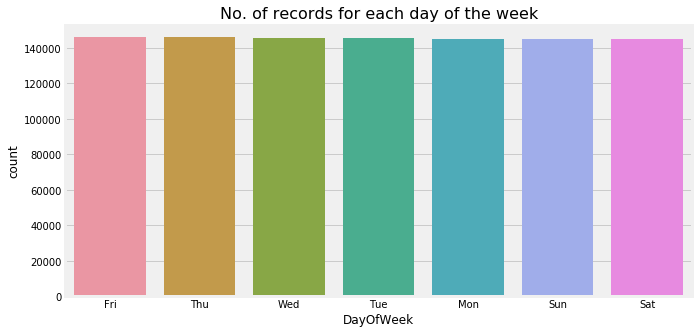

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data = df, x='DayOfWeek', ax=ax)
ax.set_title('No. of records for each day of the week', fontsize = 16)
plt.show()

In [20]:
df['Assortment'].value_counts()

basic       537445
extended    471470
extra         8294
Name: Assortment, dtype: int64

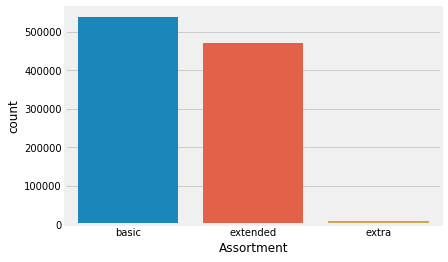

In [21]:
sns.countplot(data = df, x='Assortment')

In [22]:
# Date range of historical data

print(df['Date'].max())
print(df['Date'].min())
print(df['Date'].max() - df['Date'].min())

# Span of 941 days, or 2 years 7 months

2015-07-31 00:00:00
2013-01-01 00:00:00
941 days 00:00:00


In [23]:
df.corr()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
Sales,0.005126,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155
Promo2,0.008488,-0.091040,-0.150159,-0.008309,-0.000983,-0.006909,-0.139886,-0.009383,-0.077336,1.000000,NaN,NaN


In [24]:
# Showing the stores having the top sales

df.sort_values(by='Sales', ascending=False)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
44393,909,Mon,2015-06-22,41551,1721,1,0,0,0,a,extended,1680.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
132946,262,Fri,2015-04-03,38722,5132,1,1,b,0,b,basic,1180.0,5.0,2013.0,0,NaN,NaN,NaN
101726,262,Fri,2015-05-01,38484,5458,1,1,a,0,b,basic,1180.0,5.0,2013.0,0,NaN,NaN,NaN
87231,262,Thu,2015-05-14,38367,5192,1,0,a,1,b,basic,1180.0,5.0,2013.0,0,NaN,NaN,NaN
424086,57,Mon,2014-06-16,38037,1970,1,1,0,0,d,extended,420.0,6.0,2014.0,0,NaN,NaN,NaN
627776,817,Mon,2013-12-16,38025,4381,1,1,0,0,a,basic,140.0,3.0,2006.0,0,NaN,NaN,NaN
627220,261,Mon,2013-12-16,37646,1964,1,1,0,0,d,extended,15340.0,4.0,2015.0,1,39.0,2009.0,"Jan,Apr,Jul,Oct"
444361,262,Thu,2014-05-29,37403,5297,1,0,a,0,b,basic,1180.0,5.0,2013.0,0,NaN,NaN,NaN
620531,262,Sun,2013-12-22,37376,4916,1,0,0,0,b,basic,1180.0,5.0,2013.0,0,NaN,NaN,NaN
245945,262,Sun,2014-12-21,37122,4962,1,0,0,0,b,basic,1180.0,5.0,2013.0,0,NaN,NaN,NaN


## 1. Store as predictor for sales

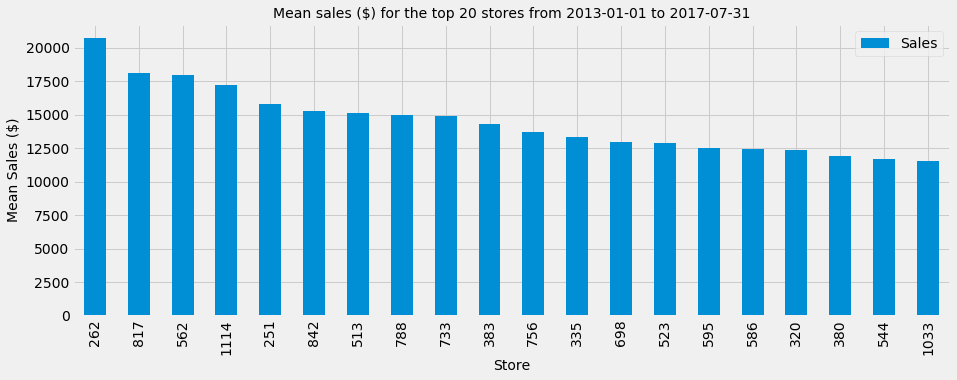

In [25]:
# Relatively great disparity in the sales revenue across different stores!
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (14,5))
df.groupby('Store')['Sales'].mean().to_frame().sort_values(by='Sales', ascending=False).head(20).plot(kind='bar', ax=ax)
ax.set_xlabel('Store', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) for the top 20 stores from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.show()

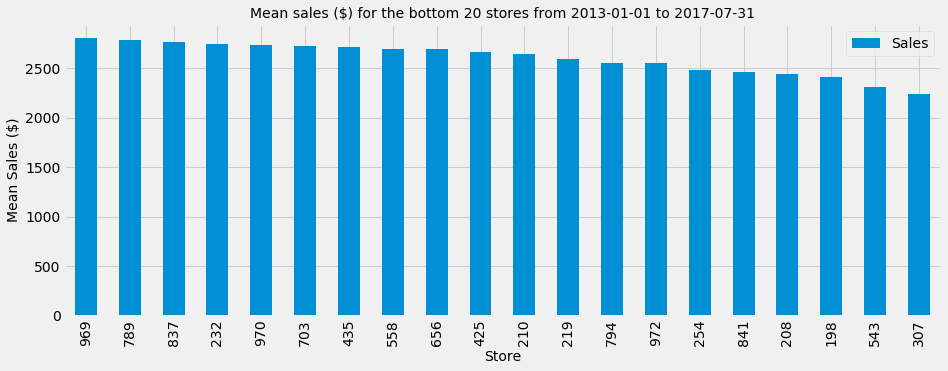

In [26]:
# Relatively great disparity in the sales revenue across different stores!

fig, ax = plt.subplots(figsize = (14,5))
df.groupby('Store')['Sales'].mean().to_frame().sort_values(by='Sales', ascending=False).tail(20).plot(kind='bar', ax=ax)
ax.set_xlabel('Store', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) for the bottom 20 stores from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.show()

## 2. Store type as predictor of sales

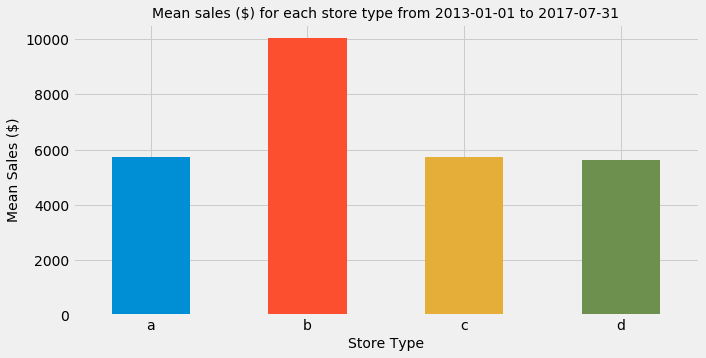

In [27]:
# The store type does affect the sales

fig, ax = plt.subplots(figsize = (10,5))

df.groupby('StoreType')['Sales'].mean().plot(kind = 'bar')

ax.set_xlabel('Store Type', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) for each store type from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.xticks(rotation='horizontal')

plt.show()

## 3. Store assortment as predictor of sales

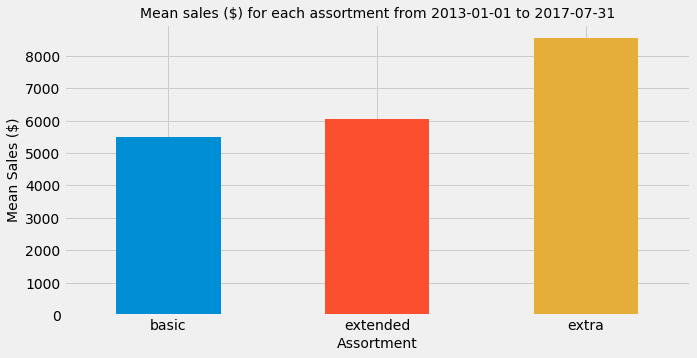

In [28]:
# The store assortment does affect the sales

fig, ax = plt.subplots(figsize = (10,5))

df.groupby('Assortment')['Sales'].mean().plot(kind = 'bar',ax=ax)

ax.set_xlabel('Assortment', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) for each assortment from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.xticks(rotation='horizontal')

plt.show()

## 4. Distance from competitor as predictor of sales

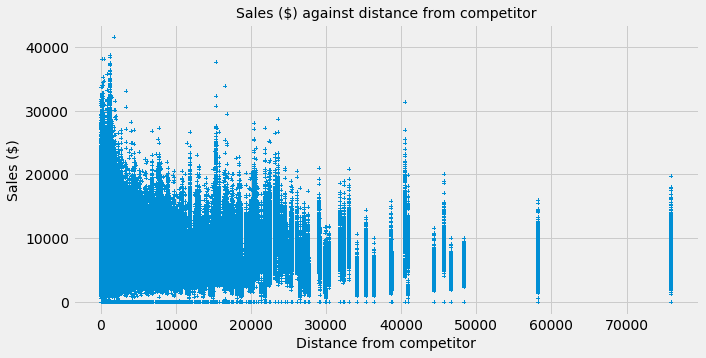

In [35]:
# Scatterplot to inspect relationship between competitor distance and sales

fig, ax = plt.subplots(figsize = (10,5))

ax.scatter(df['CompetitionDistance'], df['Sales'], s=1, marker='+')

ax.set_xlabel('Distance from competitor', fontsize = 14)
ax.set_ylabel('Sales ($)', fontsize = 14)
ax.set_title('Sales ($) against distance from competitor', fontsize = 14)

plt.show()

## 5. Day of week as predictor of sales

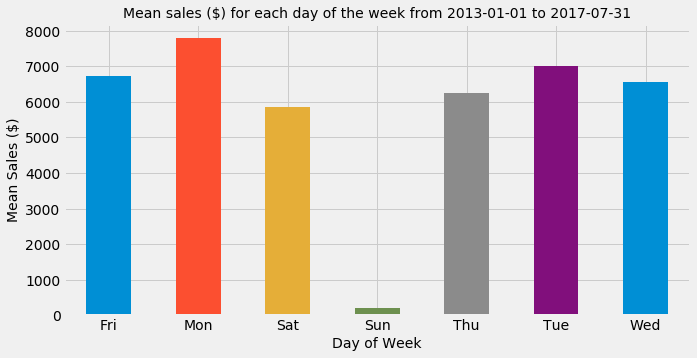

In [37]:
## Bar chart to explore relationship between day of week and sales

fig, ax = plt.subplots(figsize = (10,5))

df.groupby('DayOfWeek')['Sales'].mean().plot(kind = 'bar',ax=ax)

ax.set_xlabel('Day of Week', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) for each day of the week from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.xticks(rotation='horizontal')

plt.show()

In [41]:
df.groupby('DayOfWeek')['Sales'].mean()

DayOfWeek
Fri    6723.274305
Mon    7809.044510
Sat    5847.562599
Sun     204.183189
Thu    6247.575913
Tue    7005.244467
Wed    6555.884138
Name: Sales, dtype: float64

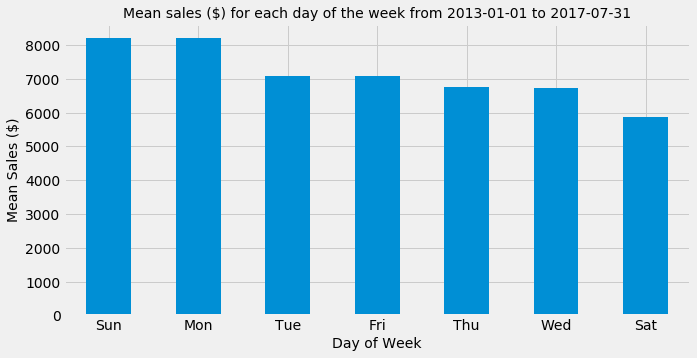

In [56]:
fig, ax = plt.subplots(figsize = (10,5))

df.groupby(['DayOfWeek', 'Open'])['Sales'].mean().unstack().drop(0,axis=1).sort_values(by=1, ascending=False).plot(kind='bar', ax=ax)

ax.set_xlabel('Day of Week', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) for each day of the week from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.xticks(rotation='horizontal')
ax.legend_.remove()

plt.show()

## 6. Month as predictor of sales

In [54]:
# Create a new column called month in the data frame

df['Month'] = df['Date'].dt.month

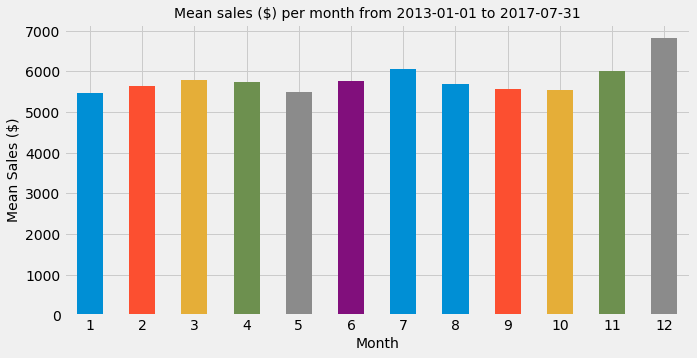

In [80]:
fig, ax = plt.subplots(figsize = (10,5))

df.groupby('Month')['Sales'].mean().plot(kind='bar', ax=ax)

ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Mean sales ($) per month from 2013-01-01 to 2017-07-31', fontsize = 14)

plt.xticks(rotation='horizontal')

plt.show()

## 7. Plot total sales against date

In [60]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Month'],
      dtype='object')

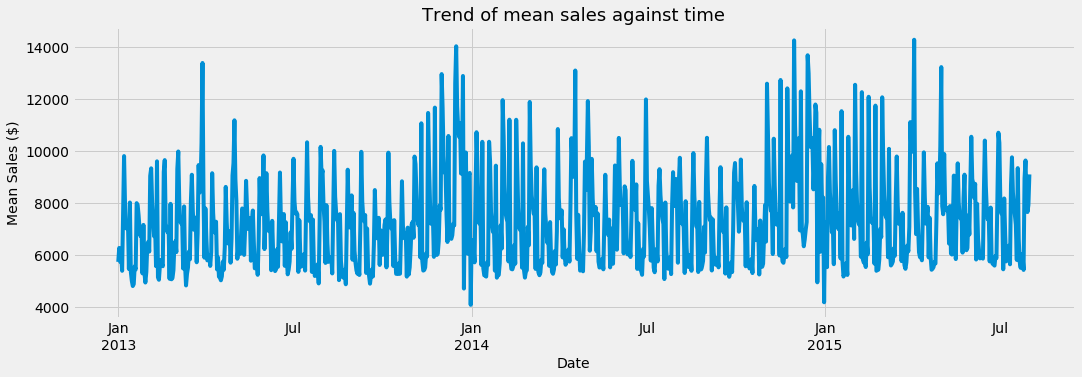

In [83]:
# 

fig, ax = plt.subplots(figsize = (16,5))
df1 = df.groupby(['Date','Open'])['Sales'].mean().to_frame().unstack()
df1['Sales'].drop(0, axis =1).plot(kind='line', ax = ax)

ax.set_xlabel('Date', fontsize = 14)
ax.set_ylabel('Mean Sales ($)', fontsize = 14)
ax.set_title('Trend of mean sales against time', fontsize = 18)

ax.legend_.remove()
plt.show()